In [30]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
Churn_modelling = pd.read_csv(".../Churn_Modelling.csv")

In [12]:
Churn_modelling.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
Churn_modelling.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


C:\Users\jkielb\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Geography', ylabel='count'>

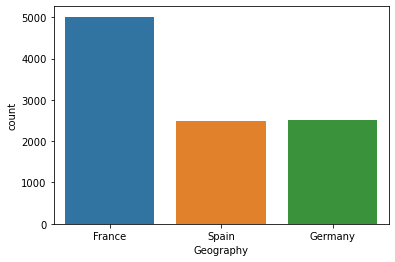

In [14]:
sns.countplot(Churn_modelling.Geography)

In [281]:
Churn_modelling.Geography

0        France
1         Spain
2        France
3        France
4         Spain
         ...   
9995     France
9996     France
9997     France
9998    Germany
9999     France
Name: Geography, Length: 10000, dtype: object

Text(0.5, 1.0, 'Gender')

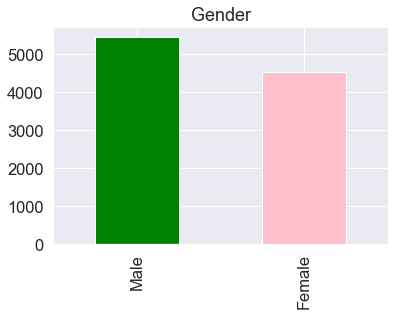

In [72]:
Churn_modelling.Gender.value_counts().plot(kind= 'bar', color= ["green", "pink"],)
plt.title('Gender')

In [78]:
X = Churn_modelling[Churn_modelling.columns[3:13]].values
y = Churn_modelling[Churn_modelling.columns[13]].values

In [79]:
X

array([[619, 'France', 'Female', ..., 1, 1, 101348.88],
       [608, 'Spain', 'Female', ..., 0, 1, 112542.58],
       [502, 'France', 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 'Female', ..., 0, 1, 42085.58],
       [772, 'Germany', 'Male', ..., 1, 0, 92888.52],
       [792, 'France', 'Female', ..., 1, 0, 38190.78]], dtype=object)

In [19]:
labelencoder = LabelEncoder()

In [20]:
X[:,2] = labelencoder.fit_transform(X[:,2])

In [21]:
X

array([[619, 'France', 0, ..., 1, 1, 101348.88],
       [608, 'Spain', 0, ..., 0, 1, 112542.58],
       [502, 'France', 0, ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 0, ..., 0, 1, 42085.58],
       [772, 'Germany', 1, ..., 1, 0, 92888.52],
       [792, 'France', 0, ..., 1, 0, 38190.78]], dtype=object)

In [80]:
Columntransformer = ColumnTransformer([('ohe',OneHotEncoder(),[1])],remainder = 'passthrough')

In [81]:
X = np.array(Columntransformer.fit_transform(X),dtype = np.str)

C:\Users\jkielb\AppData\Local\Temp\ipykernel_5188\3939610250.py:1: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X = np.array(Columntransformer.fit_transform(X),dtype = np.str)


In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [25]:
Sscaler = StandardScaler()
X_train  = Sscaler.fit_transform(X_train)
X_test  = Sscaler.fit_transform(X_test)

In [26]:
classifier = Sequential()
classifier.add(Dense(units=6,kernel_initializer='uniform',activation='relu',input_dim=X_train.shape[1]))
classifier.add(Dense(units=6,kernel_initializer='uniform',activation='relu'))
classifier.add(Dense(units=1,kernel_initializer='uniform',activation='sigmoid'))
classifier.compile(optimizer='adam',loss = "binary_crossentropy",metrics = ["accuracy"])

In [27]:
classifier.fit(X_train,y_train,batch_size=10,epochs=100)

Epoch 1/100
800/800 [==============================] - 3s 3ms/step - loss: 0.4919 - accuracy: 0.7952
Epoch 2/100
800/800 [==============================] - 2s 3ms/step - loss: 0.4305 - accuracy: 0.7960
Epoch 3/100
800/800 [==============================] - 2s 3ms/step - loss: 0.4270 - accuracy: 0.7960
Epoch 4/100
800/800 [==============================] - 2s 3ms/step - loss: 0.4235 - accuracy: 0.7960
Epoch 5/100
800/800 [==============================] - 2s 3ms/step - loss: 0.4207 - accuracy: 0.8181
Epoch 6/100
800/800 [==============================] - 2s 3ms/step - loss: 0.4183 - accuracy: 0.8259
Epoch 7/100
800/800 [==============================] - 2s 3ms/step - loss: 0.4163 - accuracy: 0.8264
Epoch 8/100
800/800 [==============================] - 2s 3ms/step - loss: 0.4150 - accuracy: 0.8304
Epoch 9/100
800/800 [==============================] - 2s 3ms/step - loss: 0.4135 - accuracy: 0.8294
Epoch 10/100
800/800 [==============================] - 2s 3ms/step - loss: 0.4122 - accura

800/800 [==============================] - 2s 2ms/step - loss: 0.3997 - accuracy: 0.8359
Epoch 82/100
800/800 [==============================] - 2s 2ms/step - loss: 0.4000 - accuracy: 0.8347
Epoch 83/100
800/800 [==============================] - 2s 2ms/step - loss: 0.3998 - accuracy: 0.8349
Epoch 84/100
800/800 [==============================] - 2s 3ms/step - loss: 0.4001 - accuracy: 0.8355
Epoch 85/100
800/800 [==============================] - 2s 3ms/step - loss: 0.4000 - accuracy: 0.8363
Epoch 86/100
800/800 [==============================] - 2s 3ms/step - loss: 0.3997 - accuracy: 0.8360
Epoch 87/100
800/800 [==============================] - 2s 3ms/step - loss: 0.3999 - accuracy: 0.8357
Epoch 88/100
800/800 [==============================] - 2s 3ms/step - loss: 0.3997 - accuracy: 0.8341
Epoch 89/100
800/800 [==============================] - 2s 3ms/step - loss: 0.3997 - accuracy: 0.8345
Epoch 90/100
800/800 [==============================] - 2s 3ms/step - loss: 0.3998 - accuracy: 

In [28]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred>0.5)
accuracy_score(y_test,y_pred)
confusion_matrix(y_test,y_pred)

63/63 [==============================] - 0s 2ms/step


array([[1549,   46],
       [ 274,  131]], dtype=int64)

Text(61.5, 0.5, 'True label')

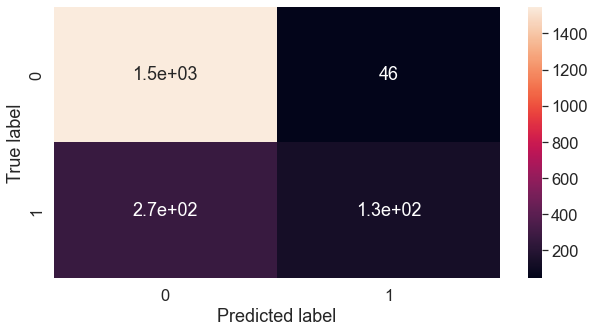

In [85]:
sns.set(font_scale=1.5)
fix,ax = plt.subplots(figsize=(10,5))
ax = sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
plt.xlabel("Predicted label")
plt.ylabel("True label")